In [11]:
import numpy as np
import matplotlib.pyplot as plt

import aero_model
import dynamic
# Modèle d'avion
aircraft = aero_model.Airbus_A319_100()

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\robertma\AppData\Local\Temp\ipykernel_10944\1074609062.py:14: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(alphas, CL, label=f"$\delta_{{trim}}$ = {delta_trim_deg}°")
C:\Users\robertma\AppData\Local\Temp\ipykernel_10944\1074609062.py:18: SyntaxWarning: invalid escape sequence '\d'
  plt.title("$C_L$ en fonction de l'incidence α pour différentes valeurs de $\delta_{trim}$")


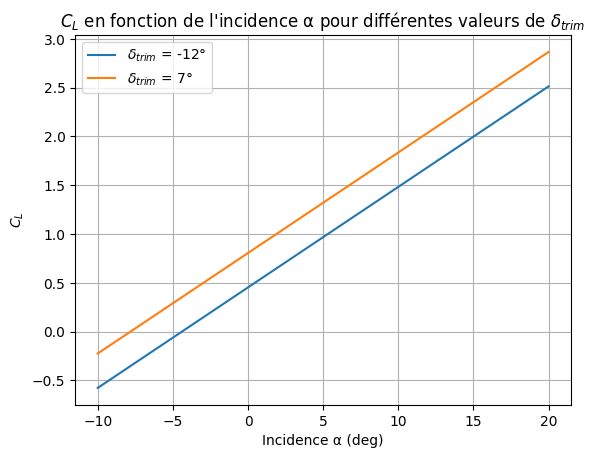

In [12]:
aircraft.set_options(stall=False, buffeting=False, wave_drag=False)  # Décrochage non pris en compte

alphas = np.linspace(-10, 20, 100)  # en degrés
alphas_rad = np.deg2rad(alphas)
delta_trims_deg = [-12, 7]  # en degrés
delta_trims_rad = np.deg2rad(delta_trims_deg)

for delta_trim, delta_trim_deg in zip(delta_trims_rad, delta_trims_deg):
    CL = []
    for alpha in alphas_rad:
        cz, _, _ = aircraft.get_aero_coefs(alpha, mach=0.4, dtrim=delta_trim, dm=0, q=0, tas=70)
        CL.append(cz)
    plt.plot(alphas, CL, label=f"$\delta_{{trim}}$ = {delta_trim_deg}°")

plt.xlabel("Incidence α (deg)")
plt.ylabel("$C_L$")
plt.title("$C_L$ en fonction de l'incidence α pour différentes valeurs de $\delta_{trim}$")
plt.legend()
plt.grid()
plt.show()

<>:34: SyntaxWarning: invalid escape sequence '\d'
<>:34: SyntaxWarning: invalid escape sequence '\d'
C:\Users\robertma\AppData\Local\Temp\ipykernel_10944\2775550239.py:34: SyntaxWarning: invalid escape sequence '\d'
  plt.title("Polaire aérodynamique $C_L = f(C_D)$ pour $\delta_{trim}=0$")


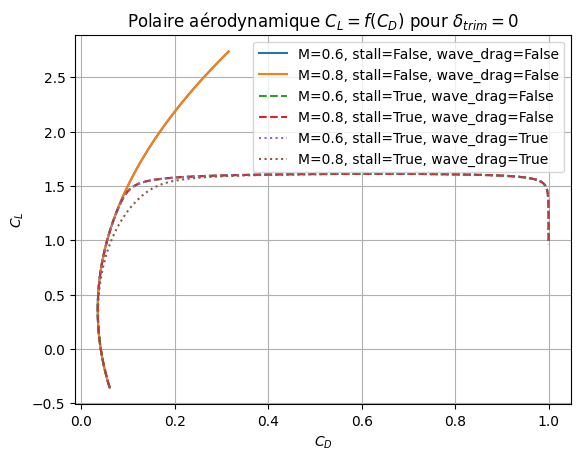

In [13]:
mach_numbers = [0.6, 0.8]
# Cas 1 : Sans décrochage, sans traînée d'onde
aircraft.set_options(stall=False, buffeting=False, wave_drag=False)
for mach in mach_numbers:
    CL, CD = [], []
    for alpha in alphas_rad:
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=mach, dtrim=0, dm=0, q=0, tas=70)
        CL.append(cz)
        CD.append(cx)
    plt.plot(CD, CL, label=f"M={mach}, stall=False, wave_drag=False")

# Cas 2 : Avec décrochage, sans traînée d'onde
aircraft.set_options(stall=True, buffeting=False, wave_drag=False)
for mach in mach_numbers:
    CL, CD = [], []
    for alpha in alphas_rad:
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=mach, dtrim=0, dm=0, q=0, tas=70)
        CL.append(cz)
        CD.append(cx)
    plt.plot(CD, CL, '--', label=f"M={mach}, stall=True, wave_drag=False")

# Cas 3 : Avec décrochage et traînée d'onde
aircraft.set_options(stall=True, buffeting=False, wave_drag=True)
for mach in mach_numbers:
    CL, CD = [], []
    for alpha in alphas_rad:
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=mach, dtrim=0, dm=0, q=0, tas=70)
        CL.append(cz)
        CD.append(cx)
    plt.plot(CD, CL, ':', label=f"M={mach}, stall=True, wave_drag=True")

plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.title("Polaire aérodynamique $C_L = f(C_D)$ pour $\delta_{trim}=0$")
plt.legend()
plt.grid()
plt.show()

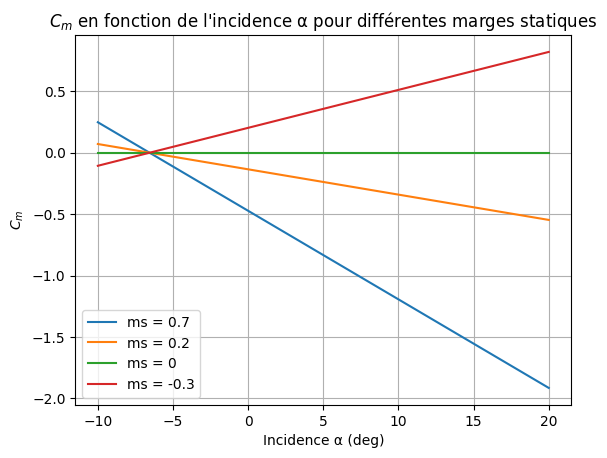

In [14]:
static_margins = [0.7, 0.2, 0, -0.3]
aircraft.set_options(stall=False, buffeting=False, wave_drag=False)
for ms in static_margins:
    aircraft.set_static_margin(ms)
    Cm = []
    for alpha in alphas_rad:
        # Cm = coefficient de moment de tangage en G
        _, _, cm = aircraft.get_aero_coefs(alpha, mach=0.4, dtrim=0, dm=0, q=0, tas=70)
        Cm.append(cm)
    plt.plot(alphas, Cm, label=f"ms = {ms}")

plt.xlabel("Incidence α (deg)")
plt.ylabel("$C_m$")
plt.title("$C_m$ en fonction de l'incidence α pour différentes marges statiques")
plt.legend()
plt.grid()
plt.show()

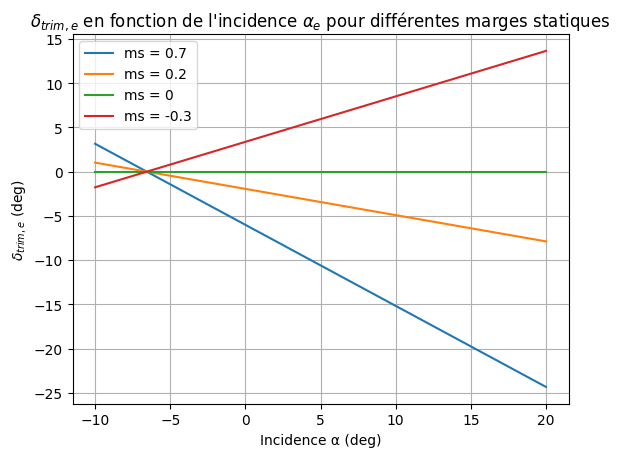

In [15]:
static_margins = [0.7, 0.2, 0, -0.3]

for ms in static_margins:
    aircraft.set_static_margin(ms)
    # Récupération des coefficients du modèle
    C_m0 = aircraft.cm0
    C_malpha = aircraft.cma
    alpha0 = aircraft.a0
    C_mtrim = aircraft.cmtrim

    delta_trim_e = []
    for alpha in alphas_rad:
        # Formule analytique
        delta_trim = -(C_m0 + C_malpha * (alpha - alpha0)) / C_mtrim
        delta_trim_e.append(np.rad2deg(delta_trim))  # Conversion en degrés pour lecture

    plt.plot(alphas, delta_trim_e, label=f"ms = {ms}")

plt.xlabel("Incidence α (deg)")
plt.ylabel(r"$\delta_{trim,e}$ (deg)")
plt.title(r"$\delta_{trim,e}$ en fonction de l'incidence $\alpha_e$ pour différentes marges statiques")
plt.legend()
plt.grid()
plt.show()

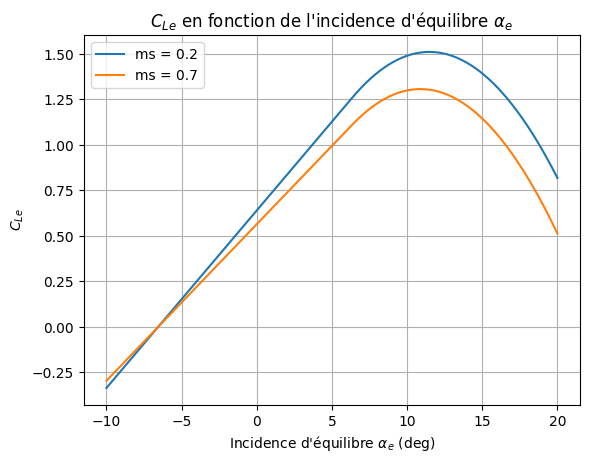

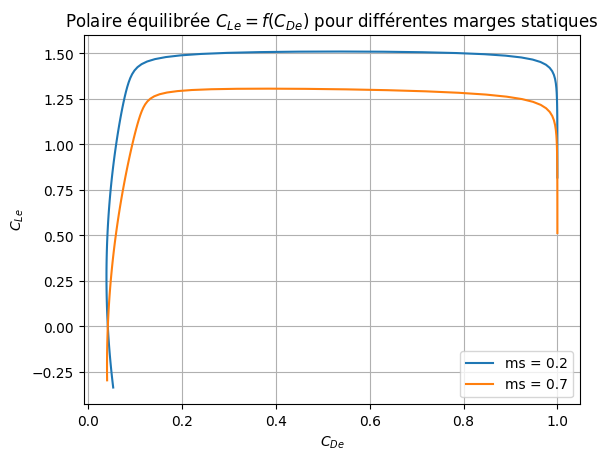

In [105]:
aircraft.set_options(stall=True, buffeting=False, wave_drag=False)

alphas = np.linspace(-10, 20, 100)  # en degrés
alphas_rad = np.deg2rad(alphas)
static_margins = [0.2, 0.7]

plt.figure()
for ms in static_margins:
    aircraft.set_static_margin(ms)
    CL_e = []
    for alpha in alphas_rad:
        # Calcul analytique de delta_trim_e pour Cm=0
        C_m0 = aircraft.cm0
        C_malpha = aircraft.cma
        alpha0 = aircraft.a0
        C_mtrim = aircraft.cmtrim
        delta_trim_e = -(C_m0 + C_malpha * (alpha - alpha0)) / C_mtrim
        # Calcul du CL à l'équilibre
        cz, _, _ = aircraft.get_aero_coefs(alpha, mach=0.4, dtrim=delta_trim_e, dm=0, q=0, tas=70)
        CL_e.append(cz)
    plt.plot(alphas, CL_e, label=f"ms = {ms}")

plt.xlabel("Incidence d'équilibre $\\alpha_e$ (deg)")
plt.ylabel("$C_{Le}$")
plt.title("$C_{Le}$ en fonction de l'incidence d'équilibre $\\alpha_e$")
plt.legend()
plt.grid()
plt.show()

# Polaire équilibrée C_Le = f(C_De)
plt.figure()
for ms in static_margins:
    aircraft.set_static_margin(ms)
    CL_e = []
    CD_e = []
    for alpha in alphas_rad:
        C_m0 = aircraft.cm0
        C_malpha = aircraft.cma
        alpha0 = aircraft.a0
        C_mtrim = aircraft.cmtrim
        delta_trim_e = -(C_m0 + C_malpha * (alpha - alpha0)) / C_mtrim
        # Calcul du CL et CD à l'équilibre
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=aircraft.mach_design, dtrim=delta_trim_e, dm=0, q=0, tas=70)
        CL_e.append(cz)
        CD_e.append(cx)
    plt.plot(CD_e, CL_e, label=f"ms = {ms}")

plt.xlabel("$C_{De}$")
plt.ylabel("$C_{Le}$")
plt.title("Polaire équilibrée $C_{Le} = f(C_{De})$ pour différentes marges statiques")
plt.legend()
plt.grid()
plt.show()

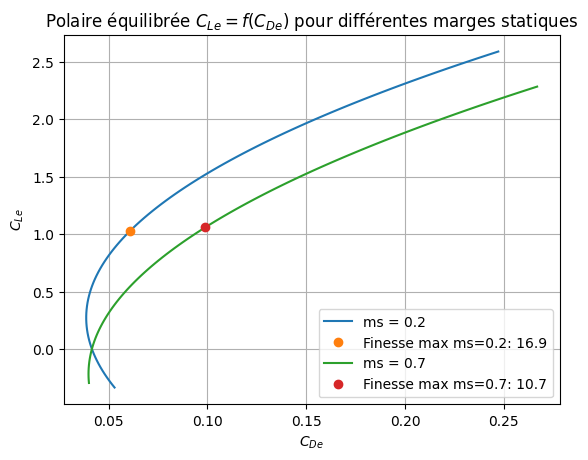

Finesse maximale pour ms=0.2 : 16.91
Finesse maximale pour ms=0.7 : 10.71


In [106]:
static_margins = [0.2, 0.7]
aircraft.set_options(stall=False, buffeting=False, wave_drag=False)
plt.figure()
max_lod = {}

for ms in static_margins:
    aircraft.set_static_margin(ms)
    CL_e = []
    CD_e = []
    LOD = []
    for alpha in alphas_rad:
        # Calcul analytique de delta_trim_e pour Cm=0
        C_m0 = aircraft.cm0
        C_malpha = aircraft.cma
        alpha0 = aircraft.a0
        C_mtrim = aircraft.cmtrim
        delta_trim_e = -(C_m0 + C_malpha * (alpha - alpha0)) / C_mtrim
        # Calcul du CL et CD à l'équilibre
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=0.4, dtrim=delta_trim_e, dm=0, q=0, tas=70)
        CL_e.append(cz)
        CD_e.append(cx)
        if cx != 0:
            LOD.append(cz/cx)
        else:
            LOD.append(np.nan)
    plt.plot(CD_e, CL_e, label=f"ms = {ms}")
    # Calcul de la finesse maximale
    max_lod[ms] = np.nanmax(LOD)
    idx_max = np.nanargmax(LOD)
    plt.plot(CD_e[idx_max], CL_e[idx_max], 'o', label=f"Finesse max ms={ms}: {max_lod[ms]:.1f}")

plt.xlabel("$C_{De}$")
plt.ylabel("$C_{Le}$")
plt.title("Polaire équilibrée $C_{Le} = f(C_{De})$ pour différentes marges statiques")
plt.legend()
plt.grid()
plt.show()

for ms in static_margins:
    print(f"Finesse maximale pour ms={ms} : {max_lod[ms]:.2f}")

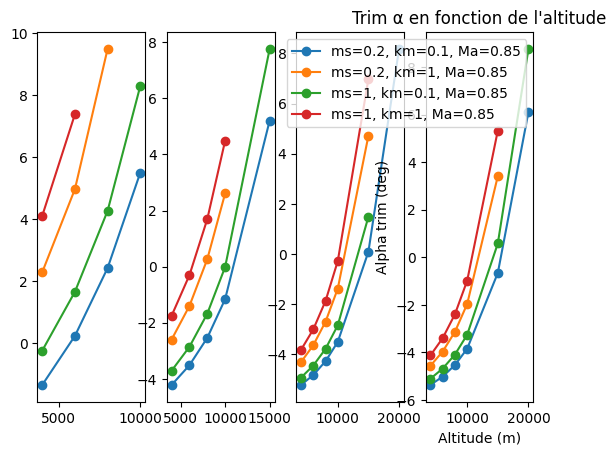

In [107]:


aircraft.set_options(stall=True, buffeting=False, wave_drag=True)
altitudes = [4000, 6000, 8000, 10000, 15000 ,20000] 
mach_numbers = [0.4, 0.6, 0.8, 0.85]
static_margins = [0.2, 1]
km_values = [0.1, 1]



results = []

for ms in static_margins:
    for km in km_values:
        aircraft.set_static_margin(ms)
        mass = aircraft.set_mass_from_km(km)
        for Ma in mach_numbers:
            for hG in altitudes:
                tas = aircraft.atm.tas_from_mach_altp(Ma, hG)
                try:
                    trim = dynamic.get_trim_level_flight(aircraft, hG, tas)
                    results.append({
                        "hG": hG,
                        "Ma": Ma,
                        "ms": ms,
                        "km": km,
                        "aoa_deg": np.rad2deg(trim["aoa"][0]),
                        "dtrim_deg": np.rad2deg(trim["dtrim"][0]),
                        "dthr": trim["dthr"][0]
                    })
                except Exception as e:
                    results.append({
                        "hG": hG,
                        "Ma": Ma,
                        "ms": ms,
                        "km": km,
                        "aoa_deg": np.nan,
                        "dtrim_deg": np.nan,
                        "dthr": np.nan
                    })

import pandas as pd
df = pd.DataFrame(results)
for ms in static_margins:
    for km in km_values:
        for i,Ma in enumerate(mach_numbers):
            plt.subplot(1,len(mach_numbers),i+1)
            subset = df[(df.ms == ms) & (df.km == km) & (df.Ma == Ma)]
            plt.plot(subset.hG, subset.aoa_deg, marker='o', label=f"ms={ms}, km={km}, Ma={Ma}")
plt.xlabel("Altitude (m)")
plt.ylabel("Alpha trim (deg)")
plt.title("Trim α en fonction de l'altitude")
plt.legend()
plt.show()


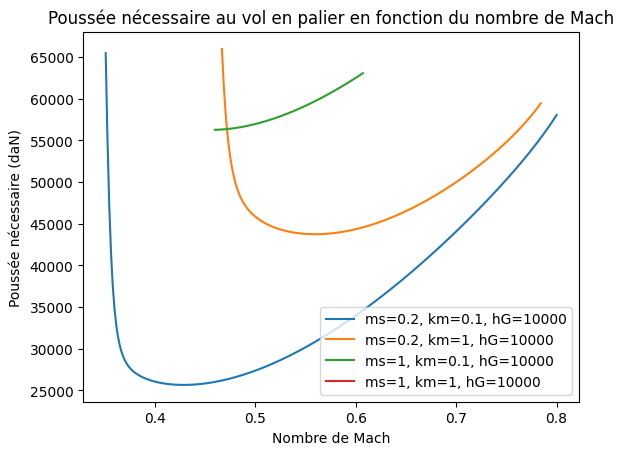

In [108]:
for ms in static_margins:
    for km in km_values:
        aircraft.set_static_margin(ms)
        mass = aircraft.set_mass_from_km(km)
        for hG in [10000]:
            machs = np.linspace(0.1, 0.8, 400)
            pouss = []
            for Ma in machs:
                tas = aircraft.atm.tas_from_mach_altp(Ma, hG)
                try:
                    trim = dynamic.get_trim_level_flight(aircraft, hG, tas, use_saturations=True)
                    pouss.append(trim["fu"][0])  
                except Exception as e:
                    pouss.append(np.nan)

            plt.plot(machs, pouss, label=f"ms={ms}, km={km}, hG={hG}")
plt.xlabel("Nombre de Mach")
plt.ylabel("Poussée nécessaire (daN)")
plt.title("Poussée nécessaire au vol en palier en fonction du nombre de Mach")
plt.legend()
plt.show()
